# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import openweathermapy.core as owm
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_keys
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [4]:
#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 1 # counter to count the number of call sets
index = 0
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f"{url}&q={city}")
        
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print(f'City not found. Skipping...') 
        
        err= err+1
    count = count + 1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        count = count + 1
        sets = (sets // 50) + 1
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
print("-------------------------")
print(f'Data Retrieval Complete')
print("-------------------------")

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a28a&q=bluff
Processing Record 2 of Set 1 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a28a&q=klaksvik
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a28a&q=ushuaia
Processing Record 4 of Set 1 | conceicao do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a28a&q=conceicao do araguaia
Processing Record 5 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a28a&q=taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | grand forks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f47e495713e79f40dcf331c6b90a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [13]:
# save to csv file
weather_data.to_csv("weather_data.csv", encoding='utf-8', index=False)

# Display the city weather data frame
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,45,AU,1573711843,19,-23.58,149.07,93.00,5.93
1,Klaksvik,25,FO,1573712391,69,62.23,-6.59,37.40,18.34
2,Ushuaia,40,AR,1573711595,100,-54.81,-68.31,42.80,8.05
3,Conceicao do Araguaia,94,BR,1573712392,95,-8.26,-49.26,72.55,2.95
4,Grand Forks,1,US,1573712392,84,47.91,-97.06,10.40,6.93
5,Katsuura,40,JP,1573712393,36,33.93,134.50,60.80,16.11
6,Ocna de Fier,75,RO,1573712393,87,45.33,21.78,55.40,3.36
7,Mataura,69,NZ,1573711884,93,-46.19,168.86,49.60,2.10
8,Albany,90,US,1573712083,72,42.65,-73.75,21.20,2.21
9,The Valley,6,AI,1573712412,80,18.22,-63.06,79.90,14.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

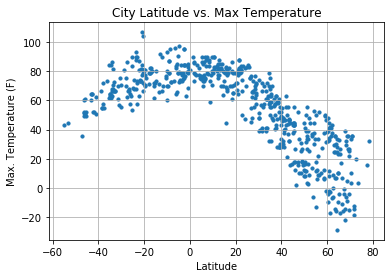

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [15]:
# Save the figure
plt.savefig("City Latitude vs Temperature.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

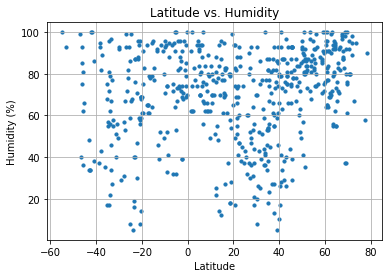

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [17]:
# Save the figure
plt.savefig("Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

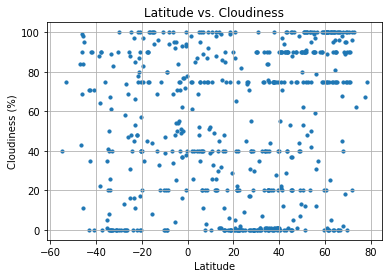

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [19]:
# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

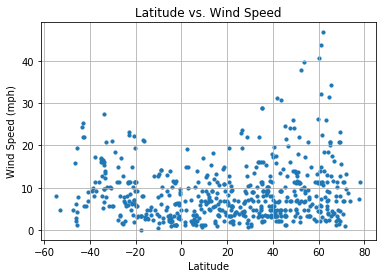

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [21]:
# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>